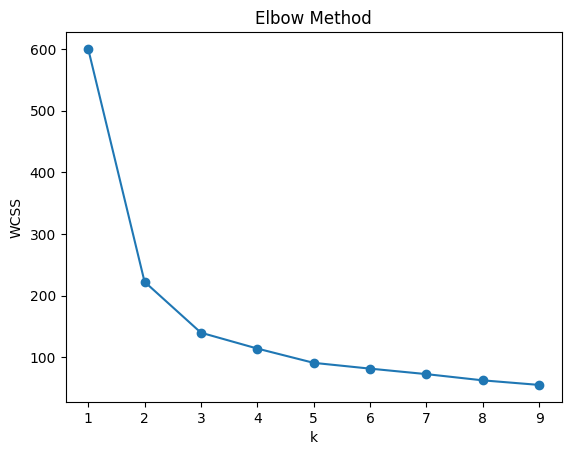

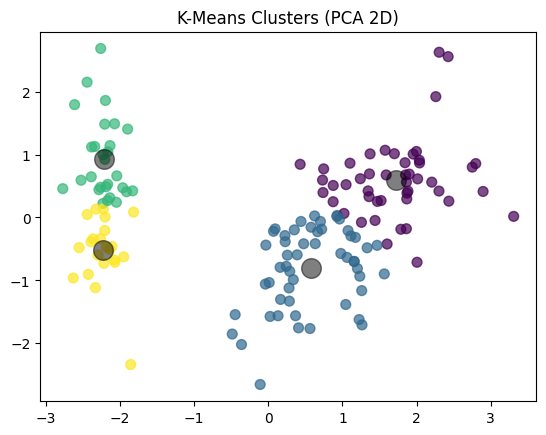

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

X_scaled = StandardScaler().fit_transform(X)

wcss = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_scaled).inertia_ for k in range(1, 10)]
plt.plot(range(1, 10), wcss, "o-"); plt.title("Elbow Method"); plt.xlabel("k"); plt.ylabel("WCSS"); plt.show()

k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_scaled)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

pca = PCA(n_components=2).fit(X_scaled)
pts = pca.transform(X_scaled)
centers_2d = pca.transform(centers)

plt.scatter(pts[:,0], pts[:,1], c=labels, s=50, cmap='viridis', alpha=0.7)
plt.scatter(centers_2d[:,0], centers_2d[:,1], c='black', s=200, alpha=0.5)
plt.title("K-Means Clusters (PCA 2D)")
plt.show()